<a href="https://colab.research.google.com/github/zahraoruji/Deep_Learning_F20_Assignments/blob/master/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment Set 7 by [zahraoruji] for [Deep Learing/Applied Machine Learning] Course at Data Science Center, SBU



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/home/CIFAR-10 Classifier Using CNN in PyTorch/data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Extracting /home/CIFAR-10 Classifier Using CNN in PyTorch/data/cifar-10-python.tar.gz to /home/CIFAR-10 Classifier Using CNN in PyTorch/data/


Extracting ./data/cifar-10-python.tar.gz to ./data


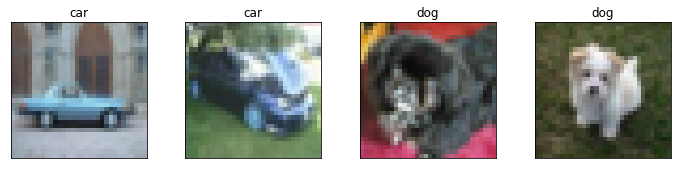

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
import os

model_directory_path = '/home/CIFAR-10 Classifier Using CNN in PyTorch/model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 2.249
[1,  4000] loss: 1.861
[1,  6000] loss: 1.687
[1,  8000] loss: 1.577
[1, 10000] loss: 1.531
[1, 12000] loss: 1.459
[2,  2000] loss: 1.410
[2,  4000] loss: 1.356
[2,  6000] loss: 1.304
[2,  8000] loss: 1.306
[2, 10000] loss: 1.276
[2, 12000] loss: 1.263
Finished Training.
Saved model parameters to disk.


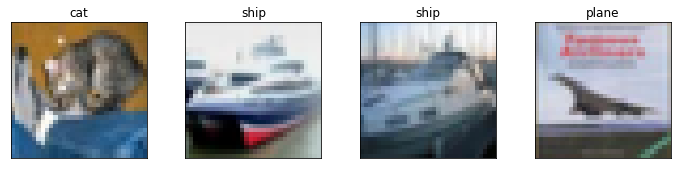

In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [8]:
outputs = net(images)
outputs

tensor([[-0.9884, -3.1108,  2.0284,  2.0974,  0.8899,  0.9691,  1.8130, -2.2152,
         -0.7483, -2.5169],
        [ 3.5623,  5.5785, -1.9335, -2.7085, -4.9654, -3.9977, -3.8757, -5.1670,
          5.2408,  3.4506],
        [ 0.6470,  2.3318, -0.4986, -0.8082, -2.1133, -1.2957, -1.6640, -1.8204,
          1.3358,  1.5961],
        [ 4.1875, -0.1309,  1.4301, -1.3113, -1.0683, -2.6453, -2.2206, -3.0991,
          3.2681, -0.4081]], grad_fn=<AddmmBackward>)

In [9]:
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[1.3280e-02, 1.5902e-03, 2.7124e-01, 2.9063e-01, 8.6877e-02, 9.4040e-02,
         2.1869e-01, 3.8939e-03, 1.6884e-02, 2.8799e-03],
        [6.7707e-02, 5.0846e-01, 2.7789e-04, 1.2803e-04, 1.3401e-05, 3.5267e-05,
         3.9846e-05, 1.0954e-05, 3.6277e-01, 6.0555e-02],
        [8.3978e-02, 4.5275e-01, 2.6707e-02, 1.9596e-02, 5.3134e-03, 1.2035e-02,
         8.3272e-03, 7.1216e-03, 1.6723e-01, 2.1694e-01],
        [6.6740e-01, 8.8904e-03, 4.2351e-02, 2.7307e-03, 3.4818e-03, 7.1935e-04,
         1.0999e-03, 4.5694e-04, 2.6613e-01, 6.7382e-03]],
       grad_fn=<SoftmaxBackward>)


In [10]:
probs, index = torch.max(sm_outputs, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

cat - 0.2906
car - 0.5085
car - 0.4528
plane - 0.6674


In [11]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 56.69%


In [12]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 63.4
car        - 80.6
bird       - 53.0
cat        - 37.9
deer       - 48.7
dog        - 38.4
frog       - 55.7
horse      - 61.9
ship       - 70.2
truck      - 57.1
